# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](https://www.youtube.com/watch?v=3VBmLGUDxWA) to get a sense of how it works.  You can also search for a clip on YouTube. 

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [1]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `sharktank.csv`. Read in the data into a Pandas `DataFrame`.

In [2]:
df = pd.read_csv("sharktank.csv")
display(df)

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [3]:
# YOUR CODE HERE
df.update(df[["Corcoran","Cuban","Greiner","Herjavec","John","O'Leary","Harrington","Guest"]].fillna(0))
df

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [4]:
# YOUR CODE HERE
df['Amount'] = df['Amount'].str.replace('$','')
df['Amount'] = df['Amount'].str.replace(',','')
df['Amount'] = df['Amount'].astype(float)
df['Equity'] = df['Equity'].str.strip('%')
df.update(df['Equity'].astype(float)/100)
df2 = df.copy()
df2 = df2.drop(df2.index[312])
df2.loc[310:320]

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
310,5.0,12.0,Lite-Netics,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
311,5.0,13.0,GrooveBook,Yes,Software / Tech,Mixed Team,150000.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Sold to Shutterfly for $14.5M; deal was for 80...
313,5.0,13.0,Bounce Boot Camp,No,Children / Education,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
314,5.0,13.0,EyeBloc,No,Software / Tech,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
315,5.0,14.0,LockerBones,Yes,Children / Education,Male,175000.0,0.5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
316,5.0,14.0,InvisiPlug,Yes,Software / Tech,Male,125000.0,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"$1 per unit until she makes it back, then 25 c..."
317,5.0,14.0,Balloon Distractions,No,Children / Education,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
318,5.0,14.0,Alaska Glacial Mud Co.,No,Fashion / Beauty,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
319,5.0,15.0,SwimZip,Yes,Children / Education,Mixed Team,60000.0,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
320,5.0,15.0,Freshly Picked,Yes,Children / Education,Female,150000.0,0.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \\$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \\$25,000 is \\$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [5]:
# YOUR CODE HERE
df2['Valuation'] = df2['Amount']/df2['Equity']
print("Most valuable company was worth " + (str)(df2['Valuation'].max()))
#print(df['Valutaion'].dtype)
compId = df2['Valuation'].astype(float).idxmax()
display(df2.loc[compId][2])

print("The largest invesment to a company was " + (str)(df2['Amount'].max()))
compId = df2['Amount'].idxmax()
display(df2.loc[compId][2])

Most valuable company was worth 25000000.0


'Zipz'

The largest invesment to a company was 5000000.0


'AirCar'

**The most valuable company was not the same company that received the most invesment from the sharks.**

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [6]:
# ENTER CODE HERE.


**YOUR EXPLANATION HERE**

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

Total businesses funded : 249
Total Healthcare businesses funded : 10
4.016064257028113%
Total Food and Beverage businesses funded : 56
22.48995983935743%
Total Business Services businesses funded : 3
1.2048192771084338%
Total Lifestyle / Home businesses funded : 37
14.859437751004014%
Total Uncertain / Other businesses funded : 5
2.0080321285140563%
Total Children / Education businesses funded : 29
11.646586345381527%
Total Consumer Products businesses funded : 10
4.016064257028113%
Total Fashion / Beauty businesses funded : 43
17.269076305220885%
Total Media / Entertainment businesses funded : 6
2.4096385542168677%
Total Software / Tech businesses funded : 15
6.024096385542169%
Total Fitness / Sports businesses funded : 23
9.236947791164658%
Total Pet Products businesses funded : 7
2.8112449799196786%
Total Green/CleanTech businesses funded : 5
2.0080321285140563%


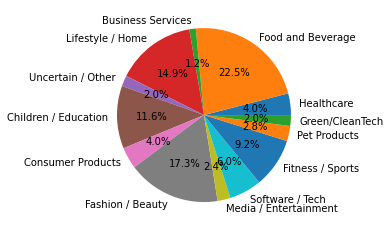

In [7]:
# ENTER CODE HERE.
import matplotlib.pyplot as plt
# Get all unique industries in our df
industries = df['Industry'].unique()

#find all businesses that got a deal
fundedBusinesses = df.groupby(["Deal"]).get_group("Yes").index.tolist()
#the length of the list is the total number of businesses
numFunded = len(fundedBusinesses)
print("Total businesses funded : " + str(numFunded))

#create array for the plot
yAxis = []
for industry in industries:
    #find all the businesses per industry that got a deal
    totalFunded = df[(df['Industry'] == industry) & (df['Deal'] == "Yes")]
    numTotal = len(totalFunded)
    print("Total " + industry + " businesses funded : " + str(numTotal))
    
    #make it into a decimal by dividing by total
    proportion = numTotal / 249
    #mult by 100 to make into percent
    proportion = proportion * 100
    
    #add it to the yAxis to show in plot
    yAxis.append(proportion)
    
    #convert to a string with a percent symbol at the end
    proportion = str(proportion)
    proportion = proportion + "%"
    print(proportion)

#put it all into a pie chart
plt.pie(yAxis, labels=industries, autopct='%1.1f%%')
plt.show()

**YOUR EXPLANATION HERE**

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the PDF to Gradescope and Notebook (ipynb) to iLearn
4. Demo your lab.